## Advertising Sales Channel Prediction Project

### Problem Statement

#### Build a model which predicts sales based on the money spent on different platforms for marketing

Importing the important libraries for data reading and cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Variable assign to the link of the data

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv'

Updating the data in the data frame

In [3]:
df=pd.read_csv(url)

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Removing the unwanted column Unnamed

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
pd.set_option('display.max_rows', 200)

The above command will help us to read all the rows.

In [8]:
df.shape

(200, 4)

There are 200 rows and 4 columns

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


1st 5 rows of the dataset

In [10]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


Last 5 rows of the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


All our data is numerical and there is no categorical data

In [12]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null values present in the dataset

In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Most of the data, barring newspaper, is normally or close to normally distributed.

There is a min value of 0.00 in radio which needs to be checked as it cannot be 0.

In [14]:
(df == 0).sum(axis=0)

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

There is only 1 value of 0 in the dataset. It can be ignored.

### EDA

Lets visialize the presence of outliers throgh boxplot.

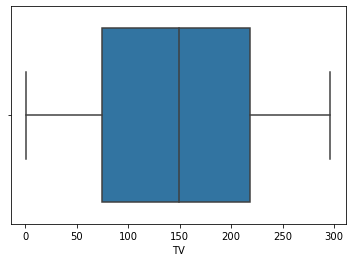

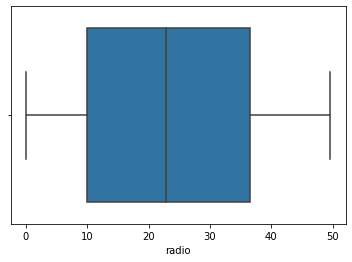

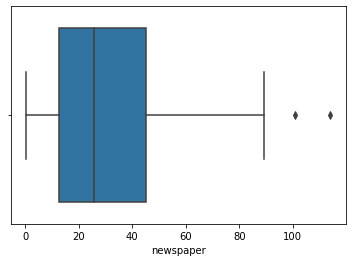

In [15]:
columns = ['TV','radio','newspaper']
for i in columns:
    sns.boxplot(df[i])
    plt.show()

There are minor outliers present in newspaper. We have to treat it before model fitting

Lets check the relationship of all the features with each other using pairplot

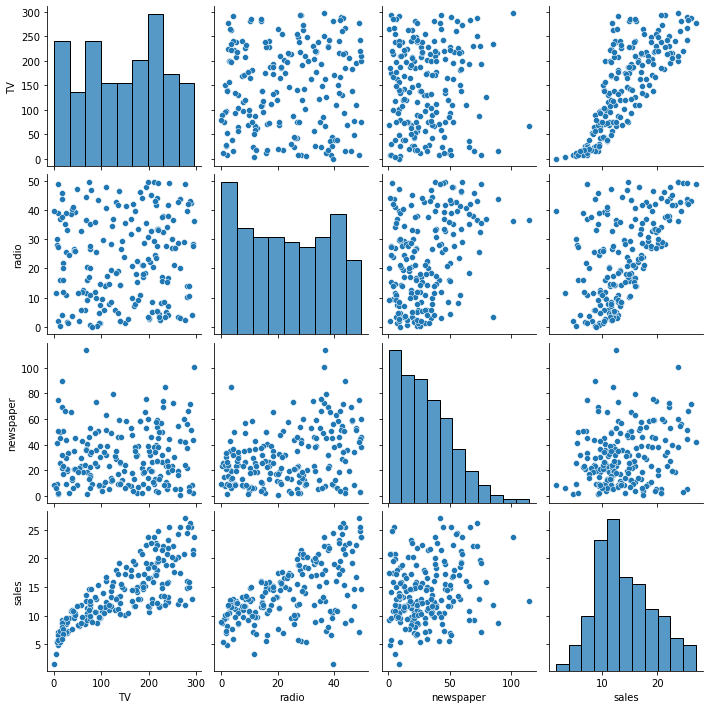

In [16]:
sns.pairplot(df)

TV has good linear relationship with Sales followed by Radio.

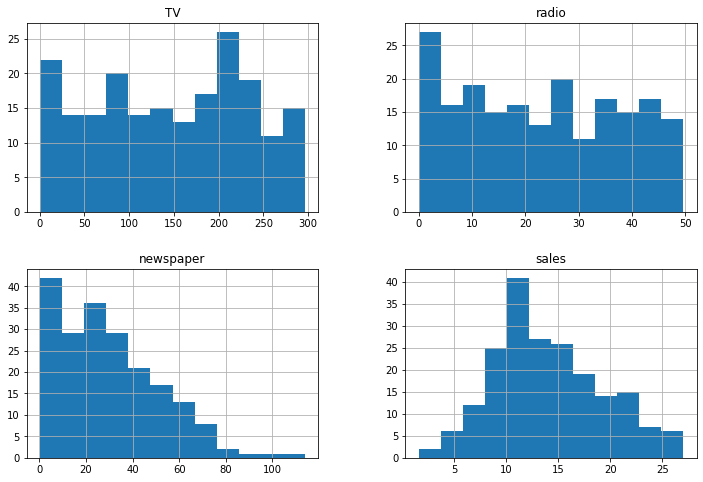

In [17]:
df.hist( bins = 12, figsize = (12,8))
plt.show()

Spending is more on TV and Radio and less on Newspaper

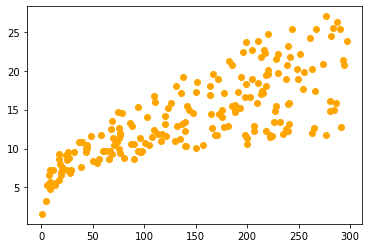

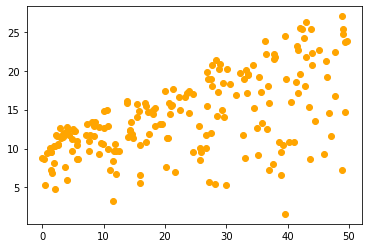

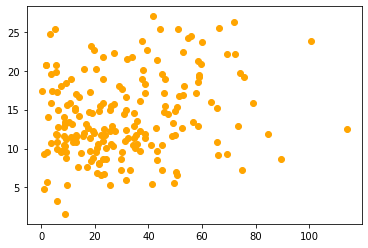

In [18]:
for i in columns:
    plt.scatter(x=df[i], y=df['sales'], c='orange')
    plt.show()

As checked with pairplot, TV has a good relationship with Sales followed by Radio. Newspaper has less impact

<AxesSubplot:>

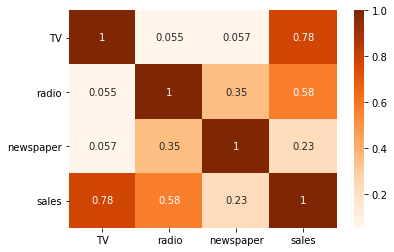

In [19]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Oranges')

As confirmed by other visualiztion, TV is the most co related with sales.

No other features are corelated with each other.

### Data Cleaning

Lets check for skewness now.

In [20]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is skewness present is newspaper and we will have to remove it.

we will remove the skew using cuberoot method

In [21]:
df['newspaper']=np.sqrt(df['newspaper'])

In [22]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

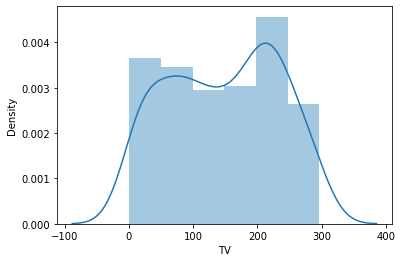

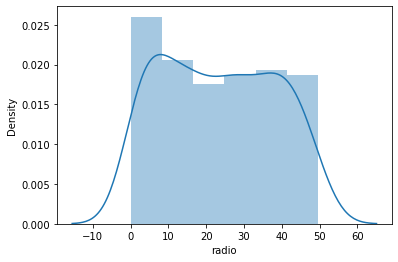

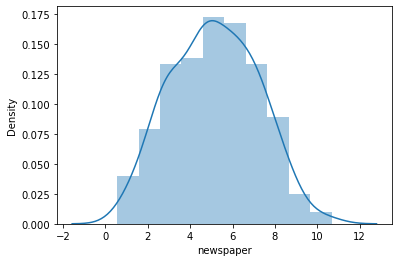

In [23]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

Great!!!

All our input features are normally distributed. Lets go ahead for model building

Splitting our data into input(x) and output(y) variable

In [24]:
x=df.drop(columns='sales')
y=df['sales']

Now we will standardize our data.

We wil be using StandardScaler for the same.

Lets import the required library

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

We have fit the data to sc_x

In [26]:
x=sc_x

x is assign to sc_x

In [27]:
x

array([[ 9.69852266e-01,  9.81522472e-01,  1.56309461e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.74855194e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.56604912e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.23357596e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.23036007e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.73106889e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.43678801e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.52652825e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.03568892e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.63332869e-01],
       [-9.45155670e-01, -1.17923146e+00, -1.08436840e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.54396138e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.46436938e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.20797302e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.07641928e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04903522e+00],
       [-9.25304978e-01,  9.00494200e-01

Now we will move forward for model fitting

### Model Building

Importing the required libraries

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

We will use Linear regression model to check for the best random state to fit our training and test data

In [29]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.9066668117866912
At random state 0,the testing accuracy is: 0.8598489884868329


At random state 1,the training accuracy is: 0.8960824841182068
At random state 1,the testing accuracy is: 0.8918199802031092


At random state 2,the training accuracy is: 0.915522839623869
At random state 2,the testing accuracy is: 0.754673352307534


At random state 3,the training accuracy is: 0.8932318720532259
At random state 3,the testing accuracy is: 0.9124431849056786


At random state 4,the training accuracy is: 0.891222706408866
At random state 4,the testing accuracy is: 0.9082554516311409


At random state 5,the training accuracy is: 0.895655123210421
At random state 5,the testing accuracy is: 0.898557314658452


At random state 6,the training accuracy is: 0.8917655782026647
At random state 6,the testing accuracy is: 0.9209209716361928


At random state 7,the training accuracy is: 0.8929101547219346
At random state 7,the testing accuracy is: 0.90952375

At random state 94,the training accuracy is: 0.90820129515793
At random state 94,the testing accuracy is: 0.8568177778775757


At random state 95,the training accuracy is: 0.893685200481859
At random state 95,the testing accuracy is: 0.8942403670869858


At random state 96,the training accuracy is: 0.903625679020793
At random state 96,the testing accuracy is: 0.8597854663484096


At random state 97,the training accuracy is: 0.8904663383166027
At random state 97,the testing accuracy is: 0.9106860534061962


At random state 98,the training accuracy is: 0.8819331391832891
At random state 98,the testing accuracy is: 0.9400200196450395


At random state 99,the training accuracy is: 0.8908046377834327
At random state 99,the testing accuracy is: 0.9189321197091166




We will now split the data with the random_state 42 as that has given us the best accuracy on training and test data.

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

Passing the model again

In [31]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of LinearRegression is', train_score)
print('The test accuracy of LinearRegression is', test_score)

The training accuracy of LinearRegression is 0.8957994678890562
The test accuracy of LinearRegression is 0.8994550077374865


#### Fitting the data to SupportVectorRegression model

In [32]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8890378972252673
0.8019778933979981
0.9131799038362434


Kernel 'rbf' has given us the best output, hence we will select 'rbf' for testing the model

In [49]:
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
pred_train=sv.predict(x_train)
pred_test=sv.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of SVR is', train_score)
print('The test accuracy of SVR is', test_score)

The training accuracy of SVR is 0.9131799038362434
The test accuracy of SVR is 0.8995851919787639


#### Checking our model through DecisionTreeRegressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.9278520051285352


The training accuracy is 1.0 through DTR but test accuracy is 0.92

#### Now Let's use Random Forest Regressor model

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is', train_score)
print('The test accuracy of RF is', test_score)

The training accuracy of RF is 0.9966530584606487
The test accuracy of RF is 0.9812297744137579


So far RFR has given us the best accuracy on training and testing data

### Cross Validation

We will cross validate our model

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
model=(lr,dt,sv,rf)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.8873331295445759


Mean Accuracy of DecisionTreeRegressor()
0.9553248362061858


Mean Accuracy of SVR(kernel='linear')
0.8789764050333838


Mean Accuracy of RandomForestRegressor()
0.9753922578583516




Lets visualize all our model performance so far

In [56]:
Performance={'Model':['LR','SVR','DTR','RFR'],
           'Trainig Score':[0.89,0.91,1.0,0.99],
           'Testing score':[0.89,0.89,0.92,0.98],
           'CV Score':[0.88,0.87, 0.95, 0.97]}

In [57]:
Model=pd.DataFrame(data=Performance)

In [58]:
Model

,Model,Trainig Score,Testing score,CV Score
0,LR,0.89,0.89,0.88
1,SVR,0.91,0.89,0.87
2,DTR,1.00,0.92,0.95
3,RFR,0.99,0.98,0.97


We can conclude that RandomforestRegressor Model has performed best.

#### Normalization and HyperTuning

Importing the required libraries for normalizing the coefficients and Hypertuning our model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Using Lasso for Normalization

Lets check the best parameters for Lasso

In [39]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [60]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8982753162349368

In [61]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8884792606387284

#### We got 0.89 score for training and 0.88 through cross validation from Lasso

Select parameters for Hypertuning the RFR model

In [42]:
parameters={'max_features':['auto','sqrt','log2'],'criterion':['mse','mae'],'max_depth':np.arange(2,10)}

In [43]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)

Fitting the model to Grid Seach to check for the best parameters

In [44]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [45]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto'}

The above gave us the best parameters to fit the model

Lets prepare our model using this parameters

In [46]:
Finalmod=RandomForestRegressor(criterion='mse', max_depth= 8, max_features= 'auto')
Finalmod.fit(x_train,y_train)
pred_final=Finalmod.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(Finalmod,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 98.24718570638285
Cross Val score 97.63017678640009


### We have got good accuracy of 98% on training and 97% on Cross validation

#### Lets Visualize our model

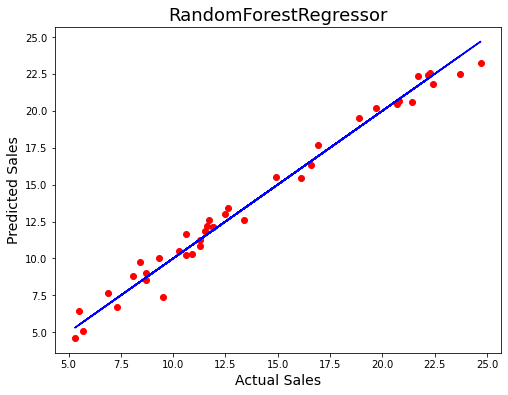

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

We can see that the line fits near the predicted values. Hence we can conclude our model is performing well.

In [63]:
import joblib
joblib.dump(Finalmod,'Advertising_Sales.obj')

['Advertising_Sales.obj']